# Tunnel Boring

* artificial  data modelling X-ray signal versus rock density

Build large tunnel boring machine, can  have different cutting shield depending on the **rock density**

* We can use X-ray signals to determine rock density
* Based on rebound signal strength in nHZ, we can   estimate a density of rock in kg/m^3

### Model Explored:
1. Linear Regression
2. PolynomialRegression
3. KNN Regression
4. DecisionTree Regression
5. Support Vector Regression
6. Boosted Trees Regression
7. Random Forest Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
# Rename columns
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

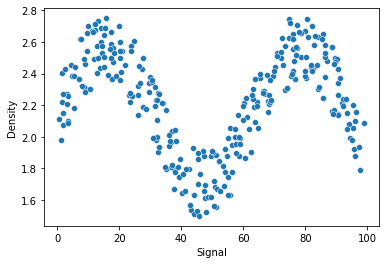

In [7]:
sns.scatterplot(x='Signal', y='Density', data=df)

**Note** We will try a lot of Regression Algorithms to compare which regression task suitable to which algorithm

In [14]:
# Split into features and labels
X = df['Signal'].values.reshape(-1, 1) # To fix single columns problem
y = df['Density']

In [24]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_preds  = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.24102551432457792

In [25]:
np.sqrt(mean_squared_error(y_test, y_preds))

0.29635030529174805

In [34]:
y_preds

array([2.21881855, 2.20065352, 2.21472324, 2.21799439, 2.20901592,
       2.21894912, 2.22381933, 2.21787738, 2.20368222, 2.2034435 ,
       2.22610239, 2.2004913 , 2.23485715, 2.24374317, 2.22322118,
       2.2158634 , 2.20285925, 2.22864354, 2.21659998, 2.23722892,
       2.20802066, 2.24431374, 2.20739768, 2.20614465, 2.19981917,
       2.23643331, 2.19917144, 2.25415309, 2.2100169 , 2.20405209])

**Warning** : There might be a problem here, because all values are  almost the same?

In [27]:
signal_range = np.arange(0, 100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))
signal_preds

array([2.25455042, 2.25398299, 2.25341557, 2.25284815, 2.25228073,
       2.25171331, 2.25114589, 2.25057846, 2.25001104, 2.24944362,
       2.2488762 , 2.24830878, 2.24774136, 2.24717394, 2.24660651,
       2.24603909, 2.24547167, 2.24490425, 2.24433683, 2.24376941,
       2.24320198, 2.24263456, 2.24206714, 2.24149972, 2.2409323 ,
       2.24036488, 2.23979745, 2.23923003, 2.23866261, 2.23809519,
       2.23752777, 2.23696035, 2.23639293, 2.2358255 , 2.23525808,
       2.23469066, 2.23412324, 2.23355582, 2.2329884 , 2.23242097,
       2.23185355, 2.23128613, 2.23071871, 2.23015129, 2.22958387,
       2.22901644, 2.22844902, 2.2278816 , 2.22731418, 2.22674676,
       2.22617934, 2.22561192, 2.22504449, 2.22447707, 2.22390965,
       2.22334223, 2.22277481, 2.22220739, 2.22163996, 2.22107254,
       2.22050512, 2.2199377 , 2.21937028, 2.21880286, 2.21823544,
       2.21766801, 2.21710059, 2.21653317, 2.21596575, 2.21539833,
       2.21483091, 2.21426348, 2.21369606, 2.21312864, 2.21256

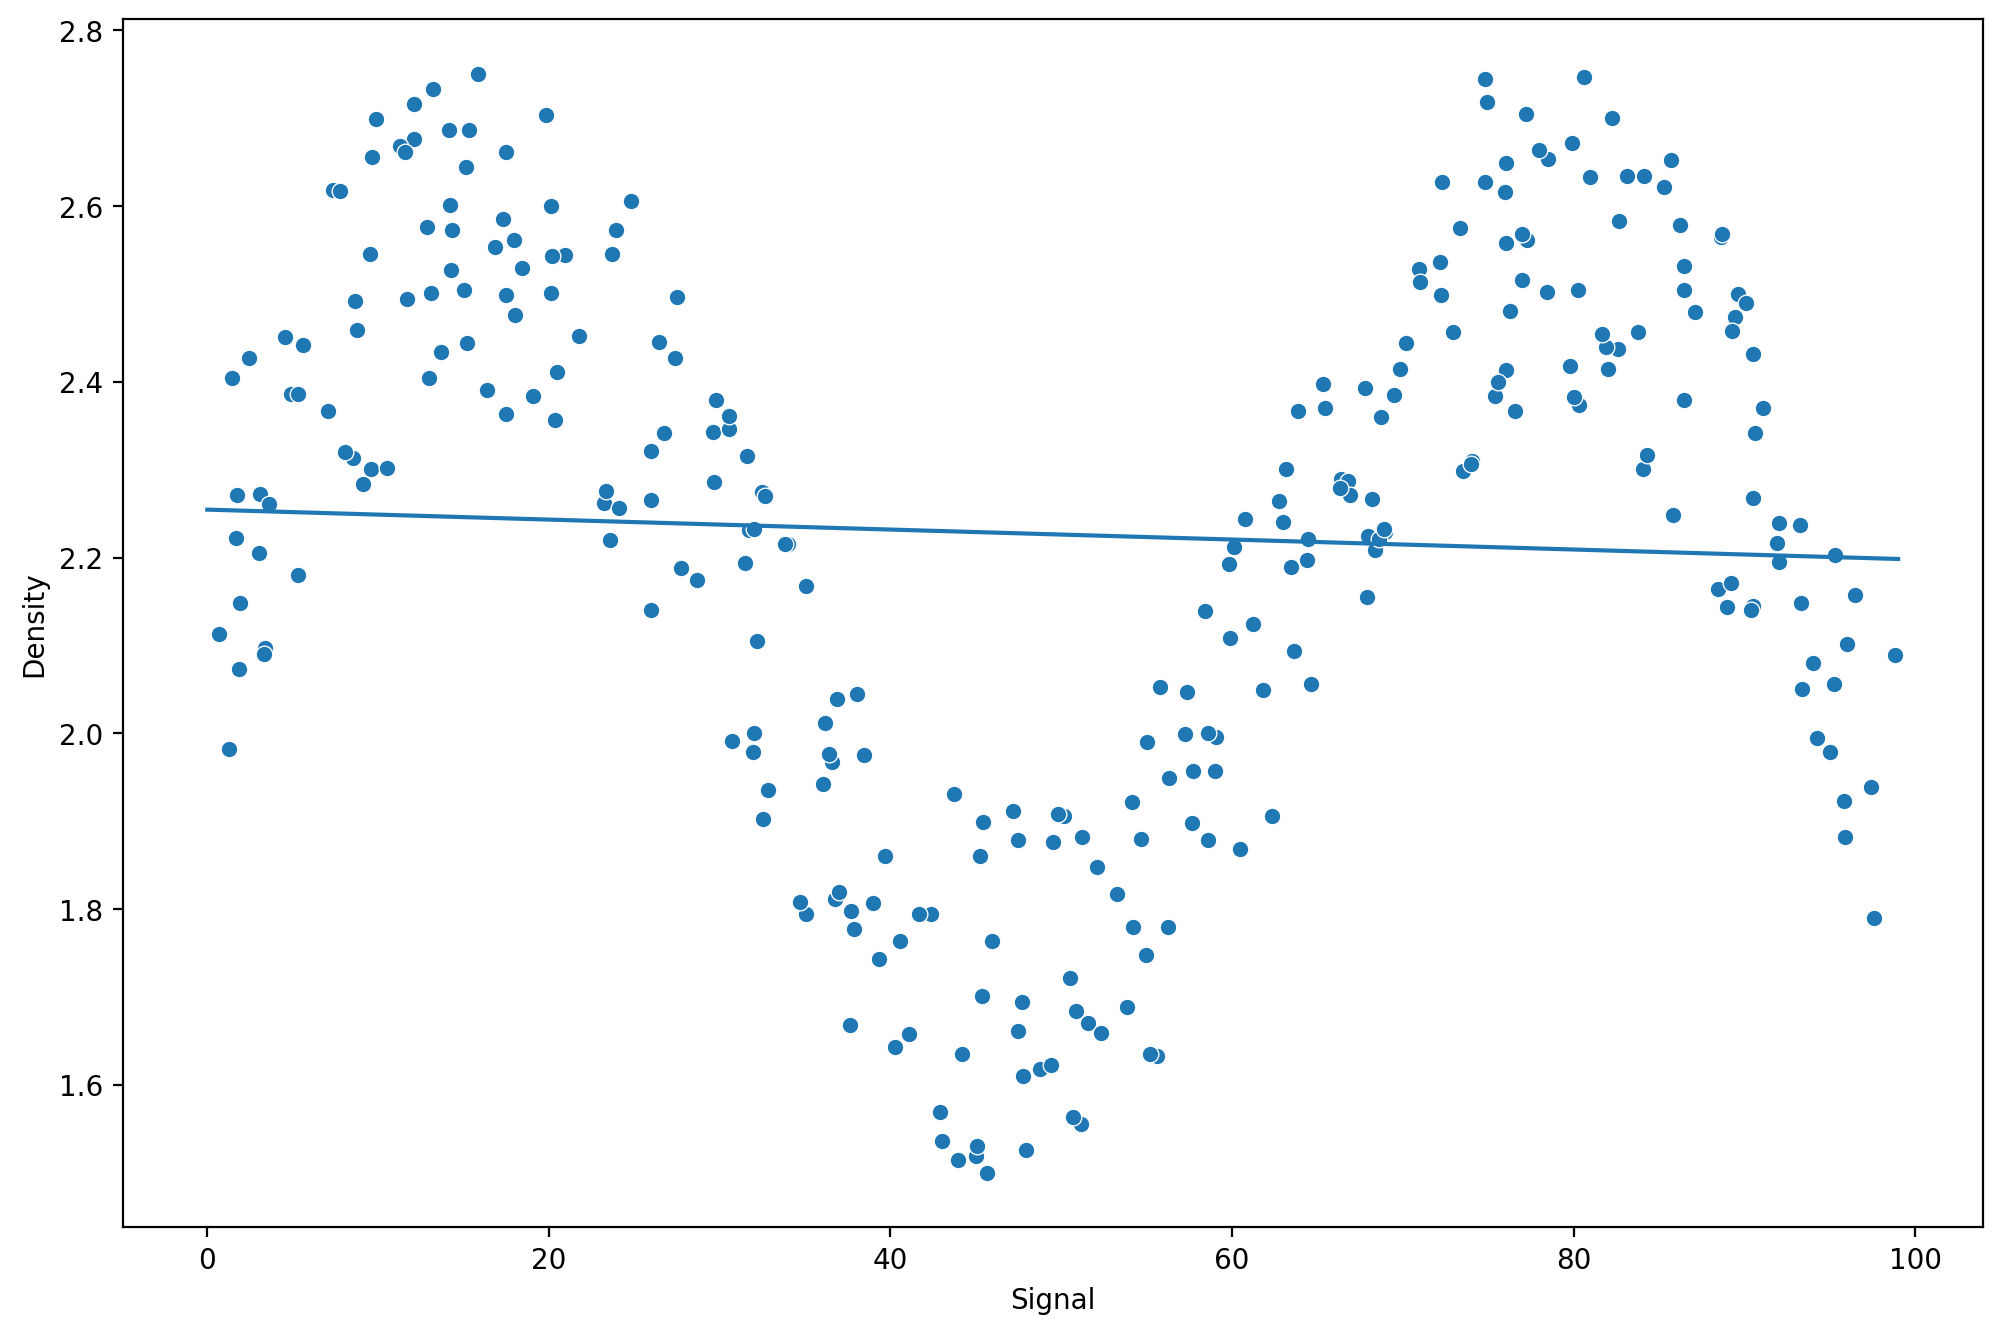

In [35]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

**NOTE** :  Always look at your prediction values when dealing with Regression to avoid Same prediction values (guessing values) especially for non-linear data